In [1]:
import uvtools
import matplotlib.pyplot as plt
import healpy
import numpy as np

fatal: No names found, cannot describe anything.


In [2]:
RES = 1
FREQS = np.arange(5, 50+RES, RES) * 1e6
data = np.sin(2*np.pi*FREQS*10e-9)

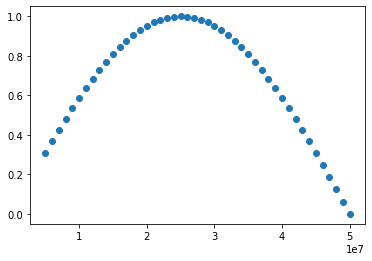

In [3]:
plt.figure()
plt.scatter(FREQS, data)
plt.show()

In [4]:
target_freqs = np.arange(5, 50+RES/2, RES/2) * 1e6

In [5]:
B,_ = uvtools.dspec.dpss_operator(
    target_freqs, 
    filter_centers=[0],
    filter_half_widths=[20e-9],
    eigenval_cutoff=[1e-12],
)

A = B[::2]

In [7]:
A.shape

(46, 8)

In [6]:
B.shape

(91, 8)

In [72]:
interp = B @ np.linalg.inv(A.T@A) @ A.T @ data

/home/christian/Documents/research/ucb_research/.venv/lib/python3.8/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


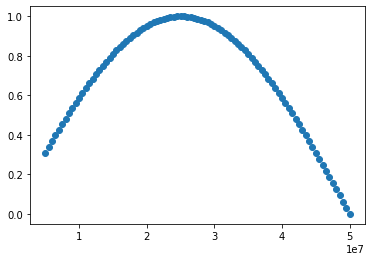

In [73]:
plt.figure()
plt.scatter(target_freqs, interp)
plt.show()

In [16]:
model, res, info = uvtools.dspec.fourier_filter(FREQS, data, wgts=np.ones_like(data), filter_centers=[0], filter_half_widths=[20e-9],
                            mode="dpss_matrix")

/home/christian/Documents/research/ucb_research/.venv/lib/python3.8/site-packages/uvtools/dspec.py:1982: ComplexWarning: Casting complex values to real discards the imaginary part
  model[i], _, info_t = _fit_basis_1d(x=x[1], y=_y, w=_w, filter_centers=filter_centers[1],


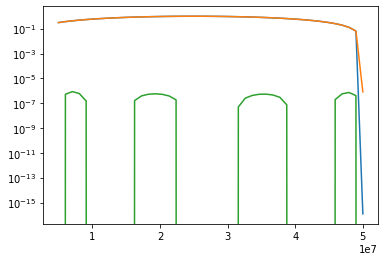

In [17]:
plt.plot(FREQS, data)
plt.plot(FREQS, model)
plt.plot(FREQS, res)
plt.yscale("log")
plt.show()

In [18]:
info

{'status': {'axis_0': {}, 'axis_1': {0: 'success'}},
 'filter_params': {'axis_0': {},
  'axis_1': {'method': 'matrix',
   'basis': 'dpss',
   'filter_centers': [0],
   'filter_half_widths': [2e-08],
   'suppression_factors': [1e-09],
   'basis_options': {'eigenval_cutoff': [1e-12]},
   'mode': 'dpss_matrix'}}}

In [23]:
model, res, info = uvtools.dspec._fit_basis_1d(FREQS, data, np.ones_like(data), filter_centers=[0],
                                               filter_half_widths=[20e-9], basis_options={"eigenval_cutoff":[1e-12]},
                                               basis="dpss",)

In [26]:
info["amat"][0]

array([0.0610002 +0.j, 0.17536147+0.j, 0.28697929+0.j, 0.3510673 +0.j,
       0.37171842+0.j, 0.36916582+0.j, 0.35147363+0.j, 0.3229673 +0.j])